## 1. Import Libraries

In [ ]:
!pip install numpy pandas scikit-learn matplotlib wordcloud seaborn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## 2. Load Dataset

In [20]:
raw_mail_data = pd.read_csv('mail_data.csv') 

In [21]:
raw_mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## 3. Handle Missing Data

In [22]:
## Replacing null values with empty string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

## 4. Label Encoding

In [6]:
# Labeling spam as 0, ham as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

NameError: name 'mail_data' is not defined

In [24]:
# Separating texts and labels
X = mail_data['Message']
Y = mail_data['Category'].astype('int')


## Visualize Dataset Distribution

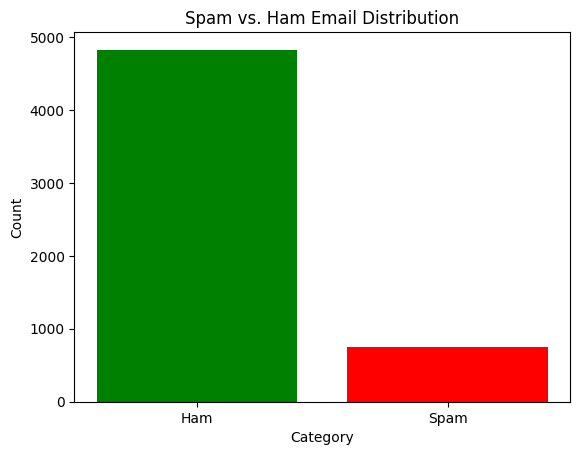

In [25]:
## Visualizing distributions
label_counts = mail_data['Category'].value_counts()
plt.bar(['Ham', 'Spam'], label_counts, color=['green', 'red'])
plt.title('Spam vs. Ham Email Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## 6. Generate Word Cloud

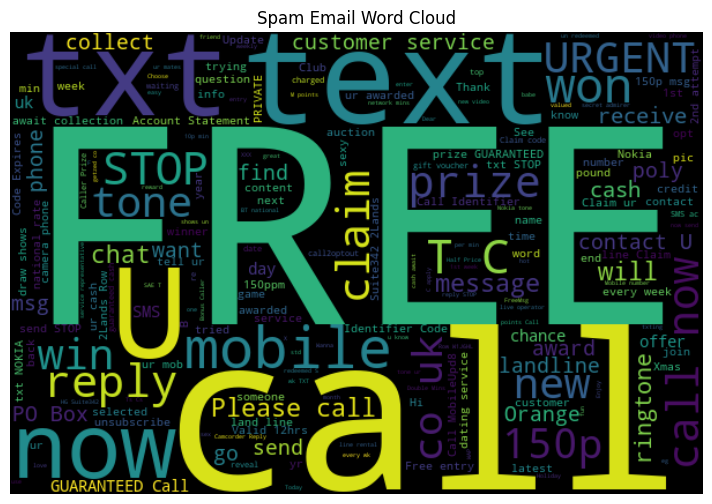

In [26]:
# Generating word cloud (spam mails)
spam_words = ' '.join(list(mail_data[mail_data['Category'] == 0]['Message']))
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Email Word Cloud')
plt.show()

## 7. Split Dataset into 70 and 30 Ratio

In [27]:
# Splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

## 8. Feature Extraction

In [28]:
# Transforming text to feature vectors
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

## 9. Training the Models

In [29]:
# Evaluating Models using function
def evaluate_model(model, model_name, is_simple_nb=False):
    start_time = time.time()
    if is_simple_nb:
        model.fit(X_train_features.toarray(), Y_train)
    else:
        model.fit(X_train_features, Y_train)
    training_time = time.time() - start_time

    # Predictions
    if is_simple_nb:
        predictions_train = model.predict(X_train_features.toarray())
        predictions_test = model.predict(X_test_features.toarray())
    else:
        predictions_train = model.predict(X_train_features)
        predictions_test = model.predict(X_test_features)

    # Accuracy
    accuracy_train = accuracy_score(Y_train, predictions_train)
    accuracy_test = accuracy_score(Y_test, predictions_test)

    # Confusion Matrix
    cm = confusion_matrix(Y_test, predictions_test)

    # Display Results
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(Y_test, predictions_test))
    print("-" * 50)

    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

## 9. Evaluation all the Models

In [2]:
# Logistic Regression
logistic_model = LogisticRegression()
evaluate_model(logistic_model, "Logistic Regression")


NameError: name 'LogisticRegression' is not defined

In [3]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
evaluate_model(nb_model, "Multinomial Naive Bayes")

NameError: name 'MultinomialNB' is not defined

In [4]:
# Simple Naive Bayes (Gaussian)
simple_nb_model = GaussianNB()
evaluate_model(simple_nb_model, "Simple Naive Bayes", is_simple_nb=True)


NameError: name 'GaussianNB' is not defined

In [5]:
# Decision Tree (J48 equivalent)
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, "Decision Tree")

NameError: name 'DecisionTreeClassifier' is not defined

## Compare Accuracy

In [1]:
# Store model accuracies for comparison
model_accuracies = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Simple Naive Bayes", "Decision Tree"],
    "Training Accuracy": [0.0, 0.0, 0.0, 0.0],  # Replace with actual training accuracies
    "Testing Accuracy": [0.0, 0.0, 0.0, 0.0]   # Replace with actual testing accuracies
}

# Add accuracies from evaluations
model_accuracies["Training Accuracy"][0] = accuracy_score(Y_train, logistic_model.predict(X_train_features))
model_accuracies["Testing Accuracy"][0] = accuracy_score(Y_test, logistic_model.predict(X_test_features))
model_accuracies["Training Accuracy"][1] = accuracy_score(Y_train, nb_model.predict(X_train_features))
model_accuracies["Testing Accuracy"][1] = accuracy_score(Y_test, nb_model.predict(X_test_features))
model_accuracies["Training Accuracy"][2] = accuracy_score(Y_train, simple_nb_model.predict(X_train_features.toarray()))
model_accuracies["Testing Accuracy"][2] = accuracy_score(Y_test, simple_nb_model.predict(X_test_features.toarray()))
model_accuracies["Training Accuracy"][3] = accuracy_score(Y_train, dt_model.predict(X_train_features))
model_accuracies["Testing Accuracy"][3] = accuracy_score(Y_test, dt_model.predict(X_test_features))

# Convert to DataFrame
accuracy_df = pd.DataFrame(model_accuracies)

# Print accuracy comparison table
print("\nAccuracy Comparison:")
print(accuracy_df)

# Plot bar chart for comparison
accuracy_df.plot(x="Model", y=["Training Accuracy", "Testing Accuracy"], kind="bar", figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'accuracy_score' is not defined